In [1]:
import sys
sys.path.insert(1, '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/asapp/')

from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import logging
from scannotation import ASAPP
from data._dataloader import DataSet
from util import _topics


import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc

from data import _sim 
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

import joblib

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

dl = DataSet()
dl.config = args
dl.initialize_path()
dl.initialize_data()
# dl.load_data()
print(dl.inpath)
print(dl.outpath)
# logging.basicConfig(filename=dl.outpath+'_model.log',
# 						format='%(asctime)s %(levelname)-8s %(message)s',
# 						level=logging.INFO,
# 						datefmt='%Y-%m-%d %H:%M:%S')

# asap = ASAPP(adata=dl,tree_min_leaf=5,tree_max_depth=1000, factorization='MVB',max_iter=10,n_pass=10)
# asap.factorize()
# asap.save_model()

/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/hbcc/hbcc
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/hbcc/hbcc


In [2]:
asap = joblib.load(dl.outpath+'_model_vb.pkl')

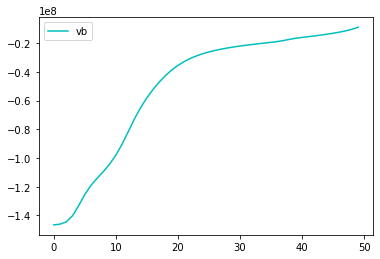

In [3]:
plt.plot(asap.llk,'c',label='vb')
plt.legend()

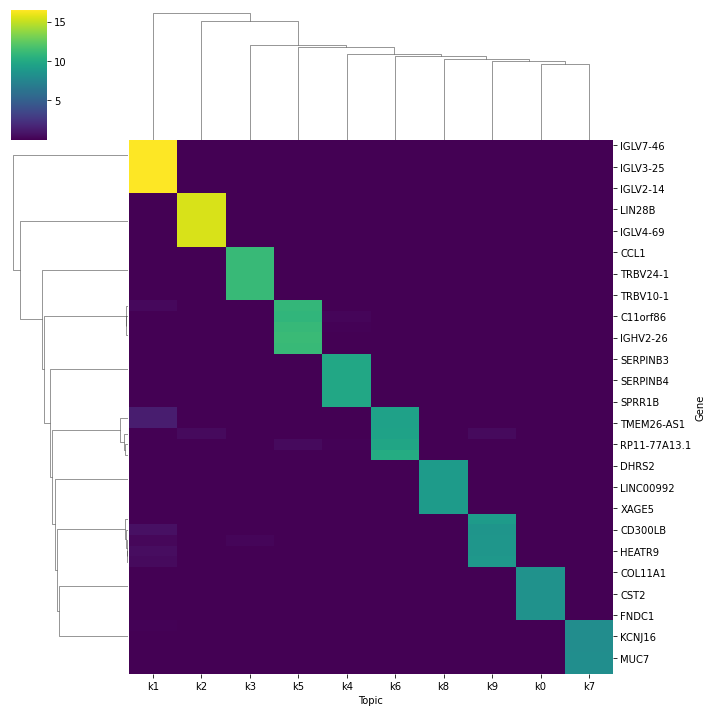

In [4]:
df_beta = pd.DataFrame(asap.Ebeta)
df_beta.columns = dl.cols
df_top = _topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [5]:
df_pl = pd.read_csv(dl.outpath+'_prior_label.csv.gz')
df_pl.columns = ['cell','cell_type']
df_pl

,cell,cell_type
0,CID3586_AAGACCTCAGCATGAG,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,Endothelial
3,CID3586_ACCCACTAGATGTCGG,Endothelial
4,CID3586_ACTGATGGTCAACTGT,Endothelial
...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,Myeloid


In [12]:
df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])
df_theta.to_csv(dl.outpath+'_model_theta.csv.gz')

In [9]:
import umap

df_theta = pd.DataFrame(asap.predicted_params['theta_a']/asap.predicted_params['theta_b'])
# df_umap= pd.DataFrame()
# df_umap['cell'] = dl.rows
# df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

# umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
# proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
# df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
# df_umap


df_umap = pd.read_csv(dl.outpath+'_umap.csv')
df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
df_umap['cell'] = dl.rows
df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]

df_umap

,cell,umap1,umap2,topic
0,CID3586_AAGACCTCAGCATGAG,2.507795,13.322988,8
1,CID3586_AAGGTTCGTAGTACCT,1.966040,13.851356,8
2,CID3586_ACCAGTAGTTGTGGCC,1.860227,12.939693,8
3,CID3586_ACCCACTAGATGTCGG,1.623410,14.411909,8
4,CID3586_ACTGATGGTCAACTGT,2.936563,14.479880,8
...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.018596,3.737222,6
100060,CID4398_TCTATTGTCGCCATAA,-0.550523,8.715772,8
100061,CID4398_TCTTTCCCAGTAAGCG,-0.484189,9.102250,2
100062,CID4398_TGCCCATGTTACGGAG,-0.531530,8.750373,8


In [55]:
# df_umap.to_csv(dl.outpath+'_umap.csv')
df_umap = pd.read_csv(dl.outpath+'_vb_umap.csv')

In [10]:

# df_umap = pd.read_csv(dl.outpath+'_umap.csv')
# df_umap['cell'] = dl.rows
df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
# df_umap = df_umap[~df_umap['cell_type'].isna()]

# df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
# df_umap['topic'] = [x for x in df_theta.iloc[:,1:].idxmax(axis=1)]
df_umap


,cell,umap1,umap2,topic,cell_type
0,CID3586_AAGACCTCAGCATGAG,2.507795,13.322988,8,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,1.966040,13.851356,8,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,1.860227,12.939693,8,Endothelial
3,CID3586_ACCCACTAGATGTCGG,1.623410,14.411909,8,Endothelial
4,CID3586_ACTGATGGTCAACTGT,2.936563,14.479880,8,Endothelial
...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.018596,3.737222,6,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,-0.550523,8.715772,8,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,-0.484189,9.102250,2,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,-0.531530,8.750373,8,Myeloid


In [11]:
df_umap.cell_type.value_counts()

T-cells              35214
Cancer Epithelial    24489
Myeloid               9675
Endothelial           7605
CAFs                  6573
PVL                   5423
Normal Epithelial     4355
Plasmablasts          3524
B-cells               3206
Name: cell_type, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ASAP')

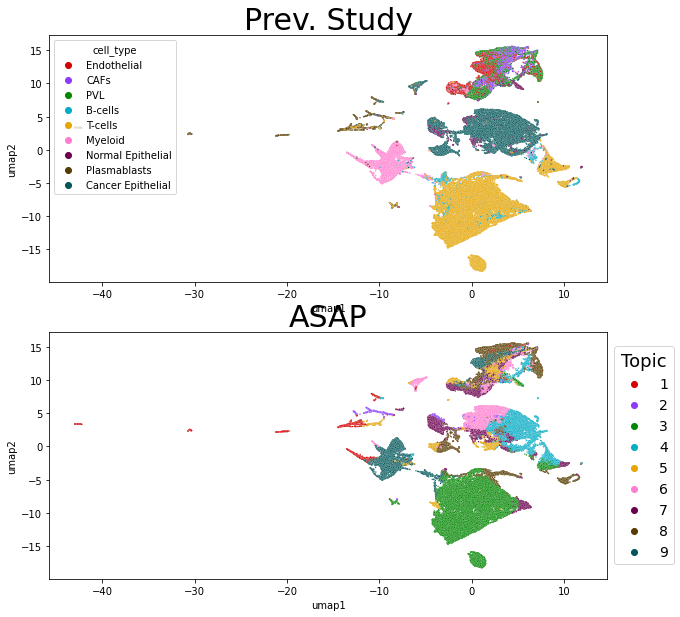

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
figure,axis = plt.subplots(2,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("Prev. Study",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic',s=2,palette=cp,legend=True,ax=axis[1])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("ASAP",fontsize=30)



Text(224.82954545454544, 0.5, 'cell_type')

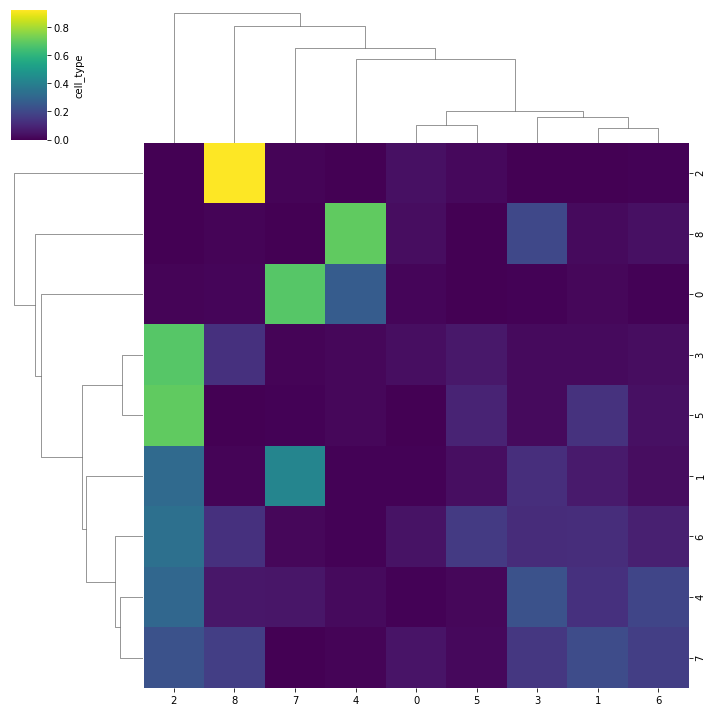

In [14]:
from sklearn.metrics.cluster import contingency_matrix
df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic,df_umap.cell_type))
# df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc_ct,df_umap.topic_blk_ct))
df_rmatch = df_rmatch.div(df_rmatch.sum(axis=1), axis=0)
sns.clustermap(df_rmatch,cmap='viridis')
plt.xlabel('sc')
plt.ylabel('cell_type')


In [15]:
df_grp = df_umap.groupby(['topic','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic'])]
df_grp['topic'] =  df_grp['topic'].astype(int)
df_grp.to_csv(dl.outpath+'_r1_topic_ct_dist.csv.gz',index=False, compression='gzip')